In [1]:

import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict 



In [2]:
def remove_missing_data(df):
        for col in df.columns:
            try:
                df[col].replace({".": np.nan}, inplace=True)
            except Exception as e:
                print(e, "\n No missing values in", col)

        return df.dropna()


In [3]:

sys.path.append("../codes")

import utilities as util



# Load data

In [4]:

data_sets_xls = pd.ExcelFile("../data/IA_report.xlsx")

print(data_sets_xls.sheet_names)




['dyslexia', 'risk', 'norm']


In [5]:

    
data_sets = defaultdict(list)


for sheet in data_sets_xls.sheet_names:
    tmp =  pd.read_excel(data_sets_xls, sheet)
    tmp = remove_missing_data(df=tmp)
    tmp.replace({"norm": 1, "dyslexia":2, "risk": 3}, inplace=True)
    tmp = tmp.astype({
        "Group": str,
        "SubjectID": str,
        "Sentence_ID":int, 
        "Word_Number": int, 
        "QUESTION_ACCURACY": int, 
        "FIXATION_COUNT": int, 
        "SKIP": int, 
        "TOTAL_READING_TIME": float, 
        "FIRST_FIXATION_DURATION": float,
        "FIRST_FIXATION_X": float, 
        "FIRST_FIXATION_Y": float, 
        "FIRST_RUN_TOTAL_READING_TIME": float, 
        "FIRST_SACCADE_AMPLITUDE": float, 
        "REGRESSION_IN": int, 
        "REGRESSION_OUT": int, 
        "REGRESSION_OUT_FULL": int, 
        "REGRESSION_PATH_DURATION": float,         
        })  

    data_sets[sheet] = tmp.sort_values(by=["SubjectID"]).dropna()

    print(sheet, tmp.shape)

    

dyslexia (12641, 17)
risk (4148, 17)
norm (39622, 17)


In [6]:

data_sets["norm"].head()



Group SubjectID  Sentence_ID  Word_Number  QUESTION_ACCURACY  \
40476     1        10           17            2                  1   
40379     1        10           21            4                 -1   
40380     1        10           21            5                 -1   
40381     1        10           21            6                 -1   
40382     1        10           21            7                 -1   

       FIXATION_COUNT  SKIP  TOTAL_READING_TIME  FIRST_FIXATION_DURATION  \
40476               1     0               317.0                    317.0   
40379               3     0               621.0                    224.0   
40380               2     0               380.0                    241.0   
40381               3     0               381.0                    181.0   
40382               4     0               694.0                    130.0   

       FIRST_FIXATION_X  FIRST_FIXATION_Y  FIRST_RUN_TOTAL_READING_TIME  \
40476             224.9             535.6                         317.0   
40379             554.2             533.0                         621.0   
40380             685.6             536.8                         380.0   
40381             855.8             553.1                         381.0   
40382            1049.7             542.9                         694.0   

       FIRST_SACCADE_AMPLITUDE  REGRESSION_IN  REGRESSION_OUT  \
40476                     1.60              0               0   
40379                     5.74              0               0   
40380                     3.56              0               0   
40381                     1.39              0               0   
40382                     4.89              0               0   

       REGRESSION_OUT_FULL  REGRESSION_PATH_DURATION  
40476                    0                     317.0  
40379                    0                     621.0  
40380                    0                     380.0  
40381                    0                     381.0  
40382                    0                     694.0

In [7]:

data_sets["dyslexia"].head()



Group SubjectID  Sentence_ID  Word_Number  QUESTION_ACCURACY  \
2079     2     ake05           25            3                 -1   
2007     2     ake05           24            7                 -1   
2006     2     ake05           24            6                 -1   
2005     2     ake05           24            5                 -1   
2004     2     ake05           24            4                 -1   

      FIXATION_COUNT  SKIP  TOTAL_READING_TIME  FIRST_FIXATION_DURATION  \
2079               6     0              2588.0                    330.0   
2007              13     0              4073.0                    387.0   
2006               5     0              1093.0                    127.0   
2005               6     0              1436.0                    317.0   
2004               9     0              3522.0                    501.0   

      FIRST_FIXATION_X  FIRST_FIXATION_Y  FIRST_RUN_TOTAL_READING_TIME  \
2079             472.1             564.1                         330.0   
2007             931.8             507.8                        3005.0   
2006             775.9             540.9                        1093.0   
2005             653.3             518.8                         509.0   
2004             477.7             528.6                         501.0   

      FIRST_SACCADE_AMPLITUDE  REGRESSION_IN  REGRESSION_OUT  \
2079                     1.52              0               1   
2007                     2.06              1               0   
2006                     1.17              0               0   
2005                     1.33              0               1   
2004                     1.45              1               1   

      REGRESSION_OUT_FULL  REGRESSION_PATH_DURATION  
2079                    1                    5213.0  
2007                    0                    3005.0  
2006                    0                    1093.0  
2005                    1                    2235.0  
2004                    1                    3183.0

In [8]:

data_sets["risk"].head()



Group SubjectID  Sentence_ID  Word_Number  QUESTION_ACCURACY  \
1339     3      m107           21            3                 -1   
1269     3      m107           13            2                  0   
1270     3      m107           13            3                  0   
1271     3      m107           13            4                  0   
1272     3      m107           13            5                  0   

      FIXATION_COUNT  SKIP  TOTAL_READING_TIME  FIRST_FIXATION_DURATION  \
1339               7     1              2341.0                    111.0   
1269               4     0               909.0                    206.0   
1270               2     0               564.0                    239.0   
1271               3     0               660.0                    314.0   
1272               1     0               222.0                    222.0   

      FIRST_FIXATION_X  FIRST_FIXATION_Y  FIRST_RUN_TOTAL_READING_TIME  \
1339             515.7             594.1                         111.0   
1269             236.5             540.1                         909.0   
1270             450.7             520.1                         239.0   
1271             543.5             536.9                         314.0   
1272             729.1             529.2                         222.0   

      FIRST_SACCADE_AMPLITUDE  REGRESSION_IN  REGRESSION_OUT  \
1339                    11.05              1               0   
1269                     1.39              0               0   
1270                     2.00              1               0   
1271                     1.67              0               1   
1272                     1.61              0               0   

      REGRESSION_OUT_FULL  REGRESSION_PATH_DURATION  
1339                    1                    3121.0  
1269                    0                     909.0  
1270                    0                     239.0  
1271                    1                     985.0  
1272                    0                     222.0

In [9]:


data_dyslexia_cols = data_sets["dyslexia"].columns
data_norm_cols = data_sets["norm"].columns
data_risk_cols = data_sets["risk"].columns




In [10]:

set(data_dyslexia_cols == data_norm_cols)



{True}

In [11]:

set(data_norm_cols == data_risk_cols)



{True}

In [12]:

data = pd.concat([v for k, v in data_sets.items()], axis=0)
data.shape



(56411, 17)

In [13]:

data.head()



Group SubjectID  Sentence_ID  Word_Number  QUESTION_ACCURACY  \
2079     2     ake05           25            3                 -1   
2007     2     ake05           24            7                 -1   
2006     2     ake05           24            6                 -1   
2005     2     ake05           24            5                 -1   
2004     2     ake05           24            4                 -1   

      FIXATION_COUNT  SKIP  TOTAL_READING_TIME  FIRST_FIXATION_DURATION  \
2079               6     0              2588.0                    330.0   
2007              13     0              4073.0                    387.0   
2006               5     0              1093.0                    127.0   
2005               6     0              1436.0                    317.0   
2004               9     0              3522.0                    501.0   

      FIRST_FIXATION_X  FIRST_FIXATION_Y  FIRST_RUN_TOTAL_READING_TIME  \
2079             472.1             564.1                         330.0   
2007             931.8             507.8                        3005.0   
2006             775.9             540.9                        1093.0   
2005             653.3             518.8                         509.0   
2004             477.7             528.6                         501.0   

      FIRST_SACCADE_AMPLITUDE  REGRESSION_IN  REGRESSION_OUT  \
2079                     1.52              0               1   
2007                     2.06              1               0   
2006                     1.17              0               0   
2005                     1.33              0               1   
2004                     1.45              1               1   

      REGRESSION_OUT_FULL  REGRESSION_PATH_DURATION  
2079                    1                    5213.0  
2007                    0                    3005.0  
2006                    0                    1093.0  
2005                    1                    2235.0  
2004                    1                    3183.0

In [14]:


set(data.columns == data_dyslexia_cols)



{True}

In [15]:

# pd.get_dummies(data, columns=["Sex"])



In [16]:

# dyslexia = data.loc[data["Group"]=="dyslexia"]

# dyslexia = data_sets["dyslexia"]



In [17]:
def plot_pies(data, col, labels):
    
    fig = plt.figure(figsize=(20, 10))
    ctr = 1
    for k, v in data.items():
        ax = fig.add_subplot(1, 3, ctr)  # three datasets
        x = [len(v[col].loc[v[col]==f]) for f in set(v[col])]
        if not labels:
            labels = set(v[col])
            patches, texts, autotexts = ax.pie(x=x, 
                                               labels=labels,
                                               autopct='%.2f', 
                                               textprops={'fontsize': 8},
                                              )
            labels = None
        else:   
            patches, texts, autotexts = ax.pie(x=x, 
                                               labels=labels, 
                                               autopct='%.2f', 
                                               textprops={'fontsize': 8}
                                              )
            
        plt.title(k, fontsize=20)
        ctr += 1
    plt.show()


    return None
    

In [ ]:

# # Gender percentage: 
# plot_pies(data=data_sets, col="Sentence_ID", labels=None)




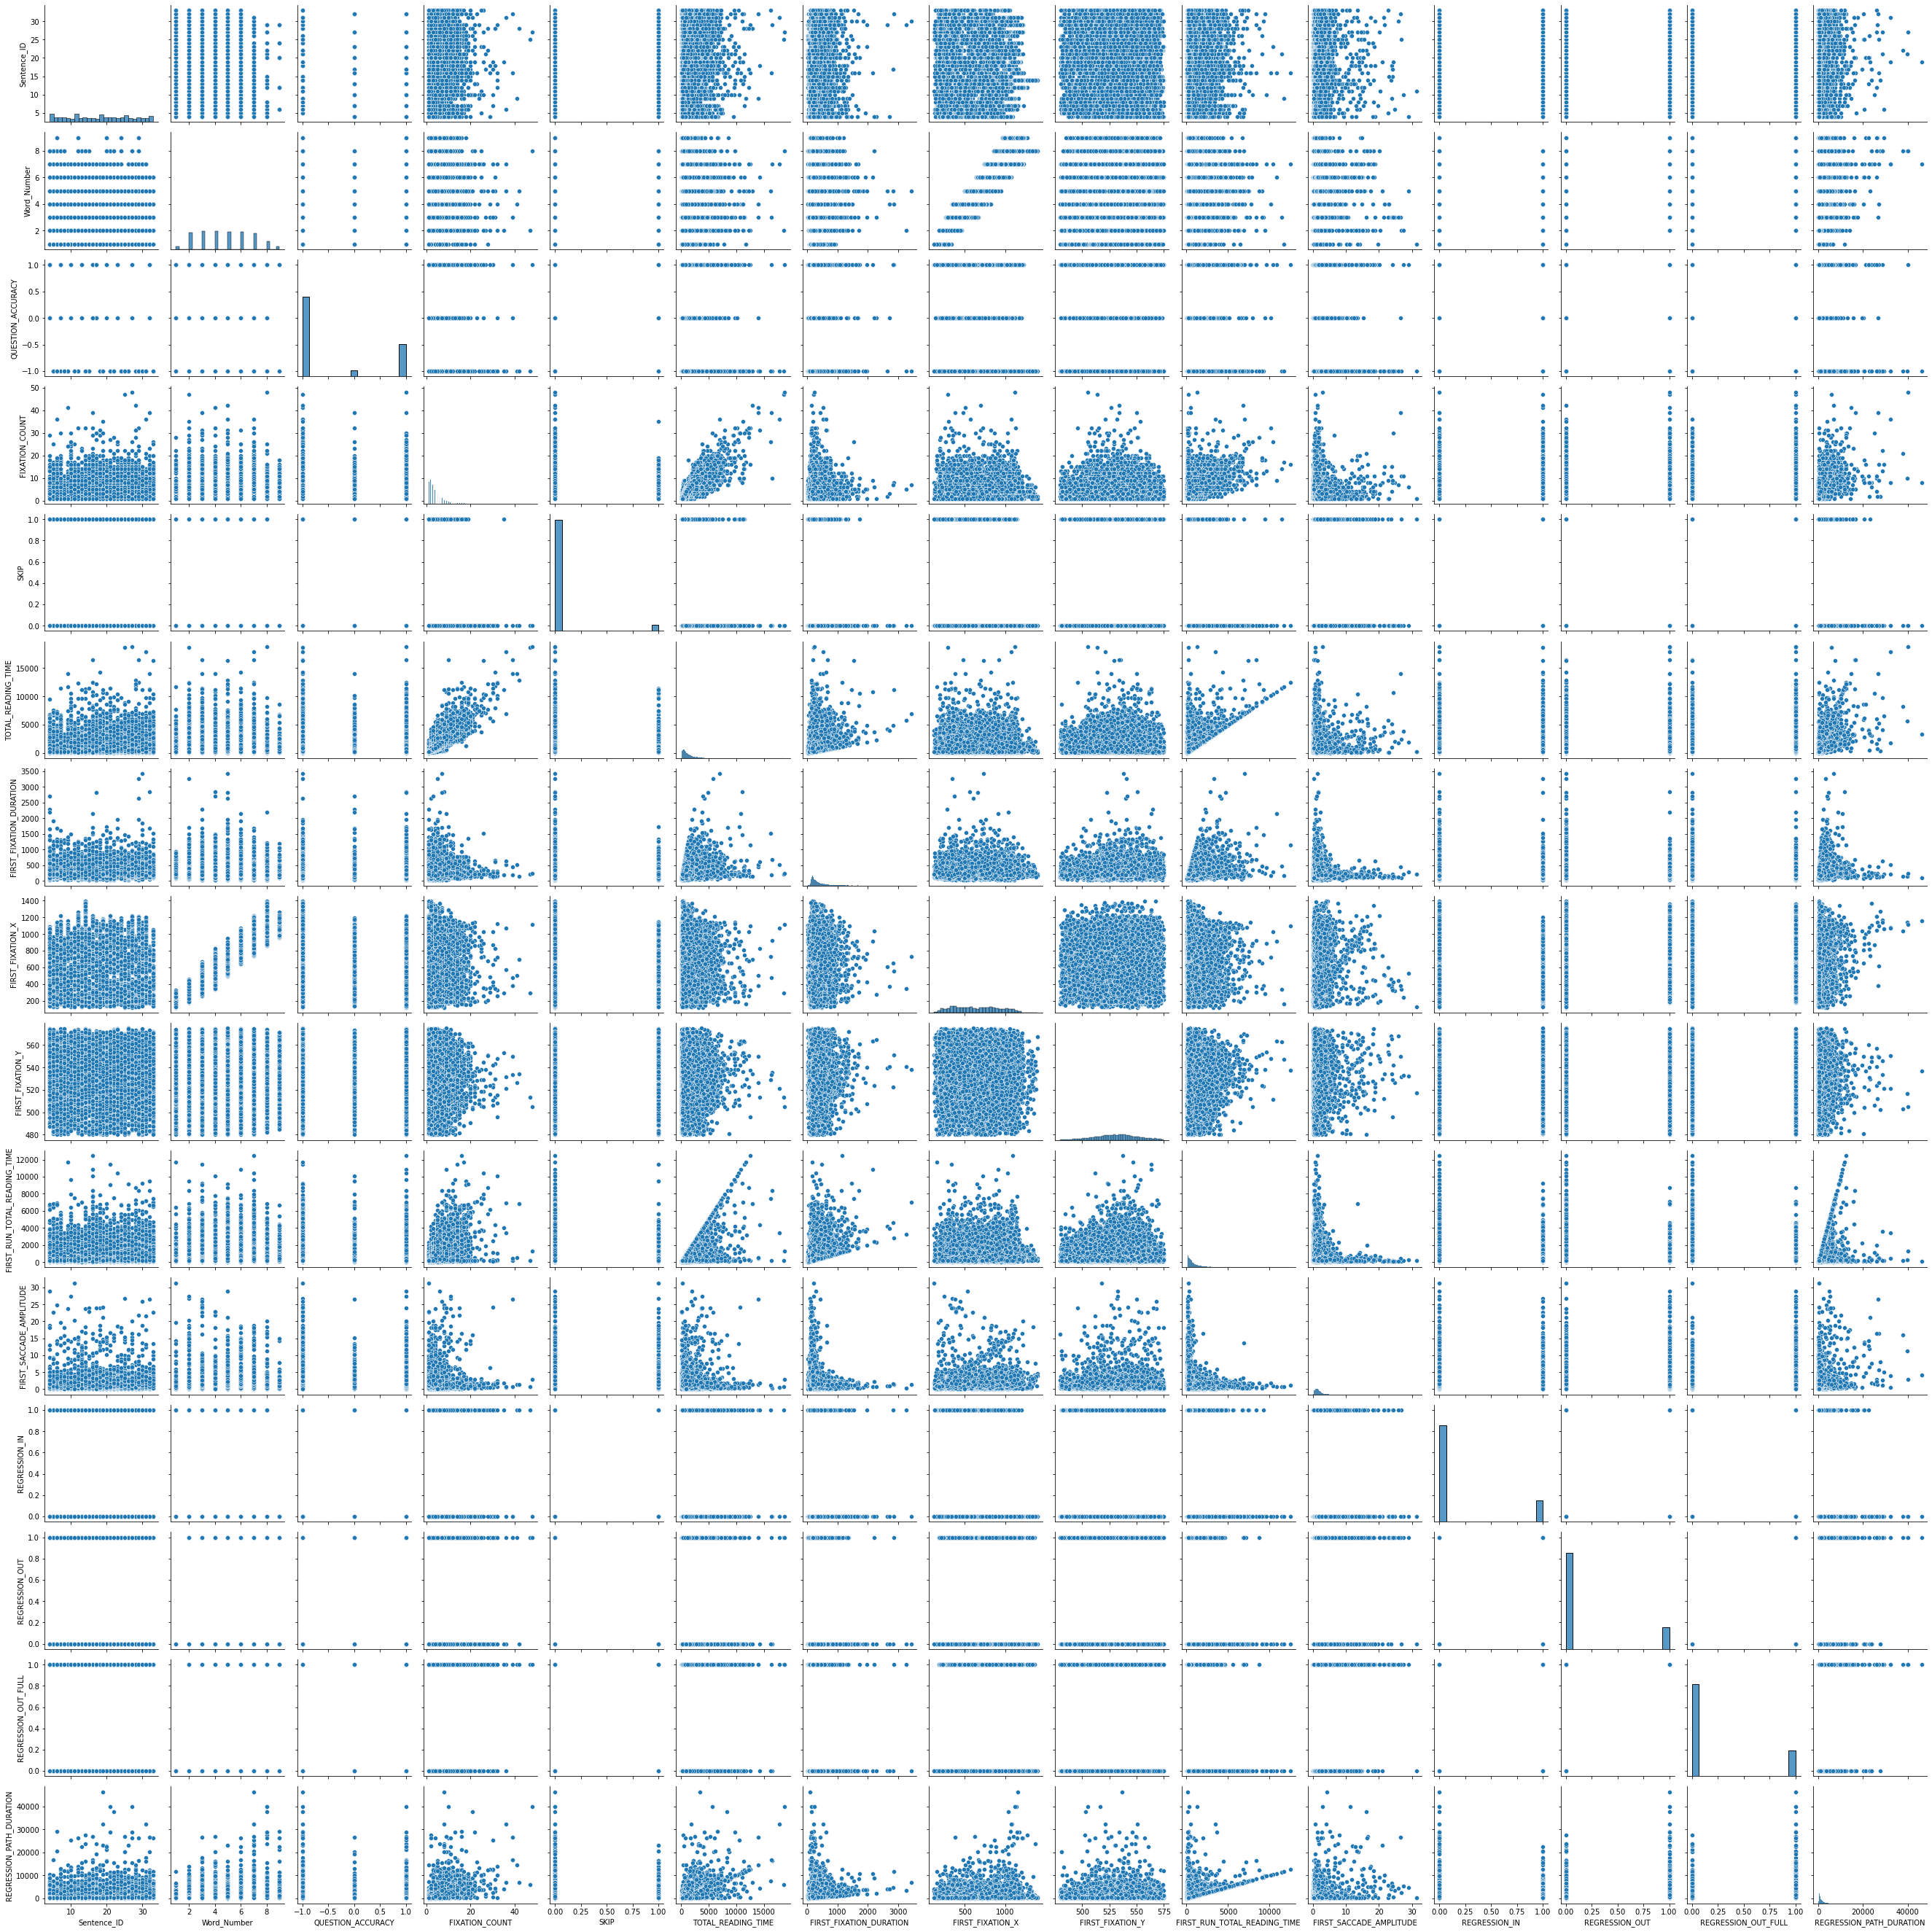

In [18]:

# Dyslexia pairplots:
sns.pairplot(data=data_sets["dyslexia"], )
plt.show()
    
    




- No linear correlation between any two pairs of the features


- Features distribution could be important 


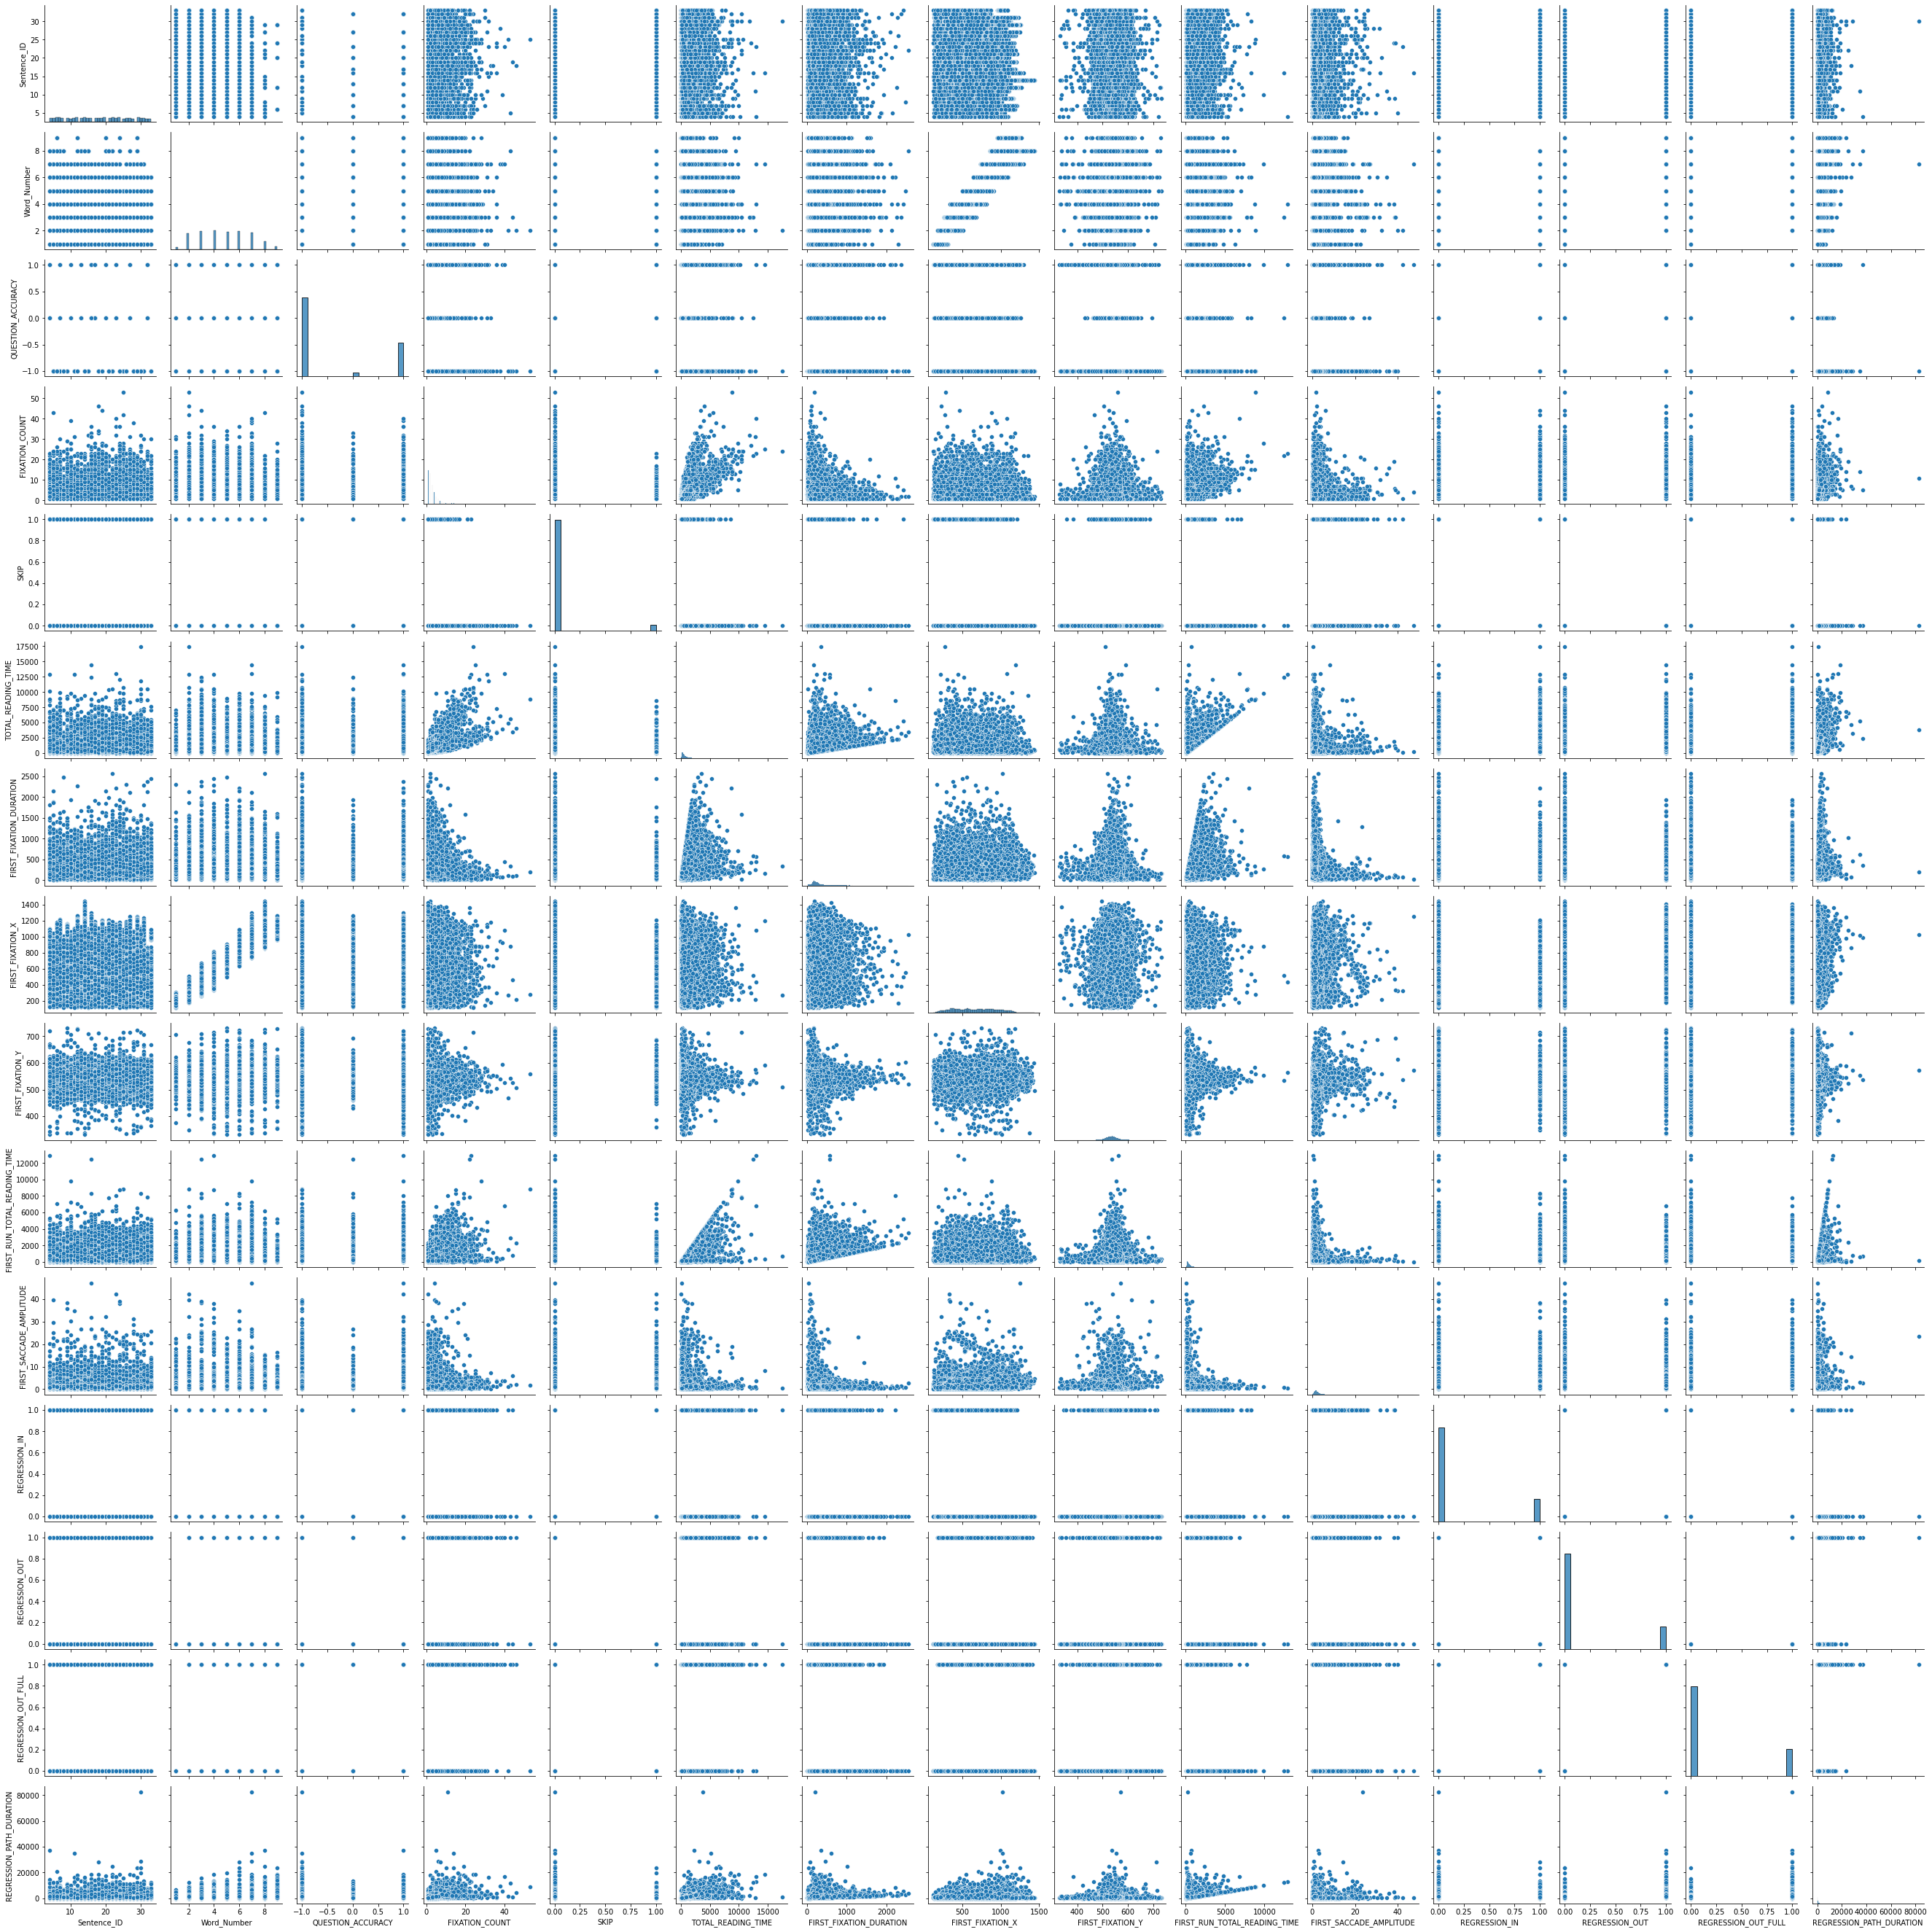

In [19]:

# Normal data pair-plots
sns.pairplot(data=data_sets["norm"], )
plt.show()





- No linear correlation between any two pairs of the features


- Features distribution could be important 



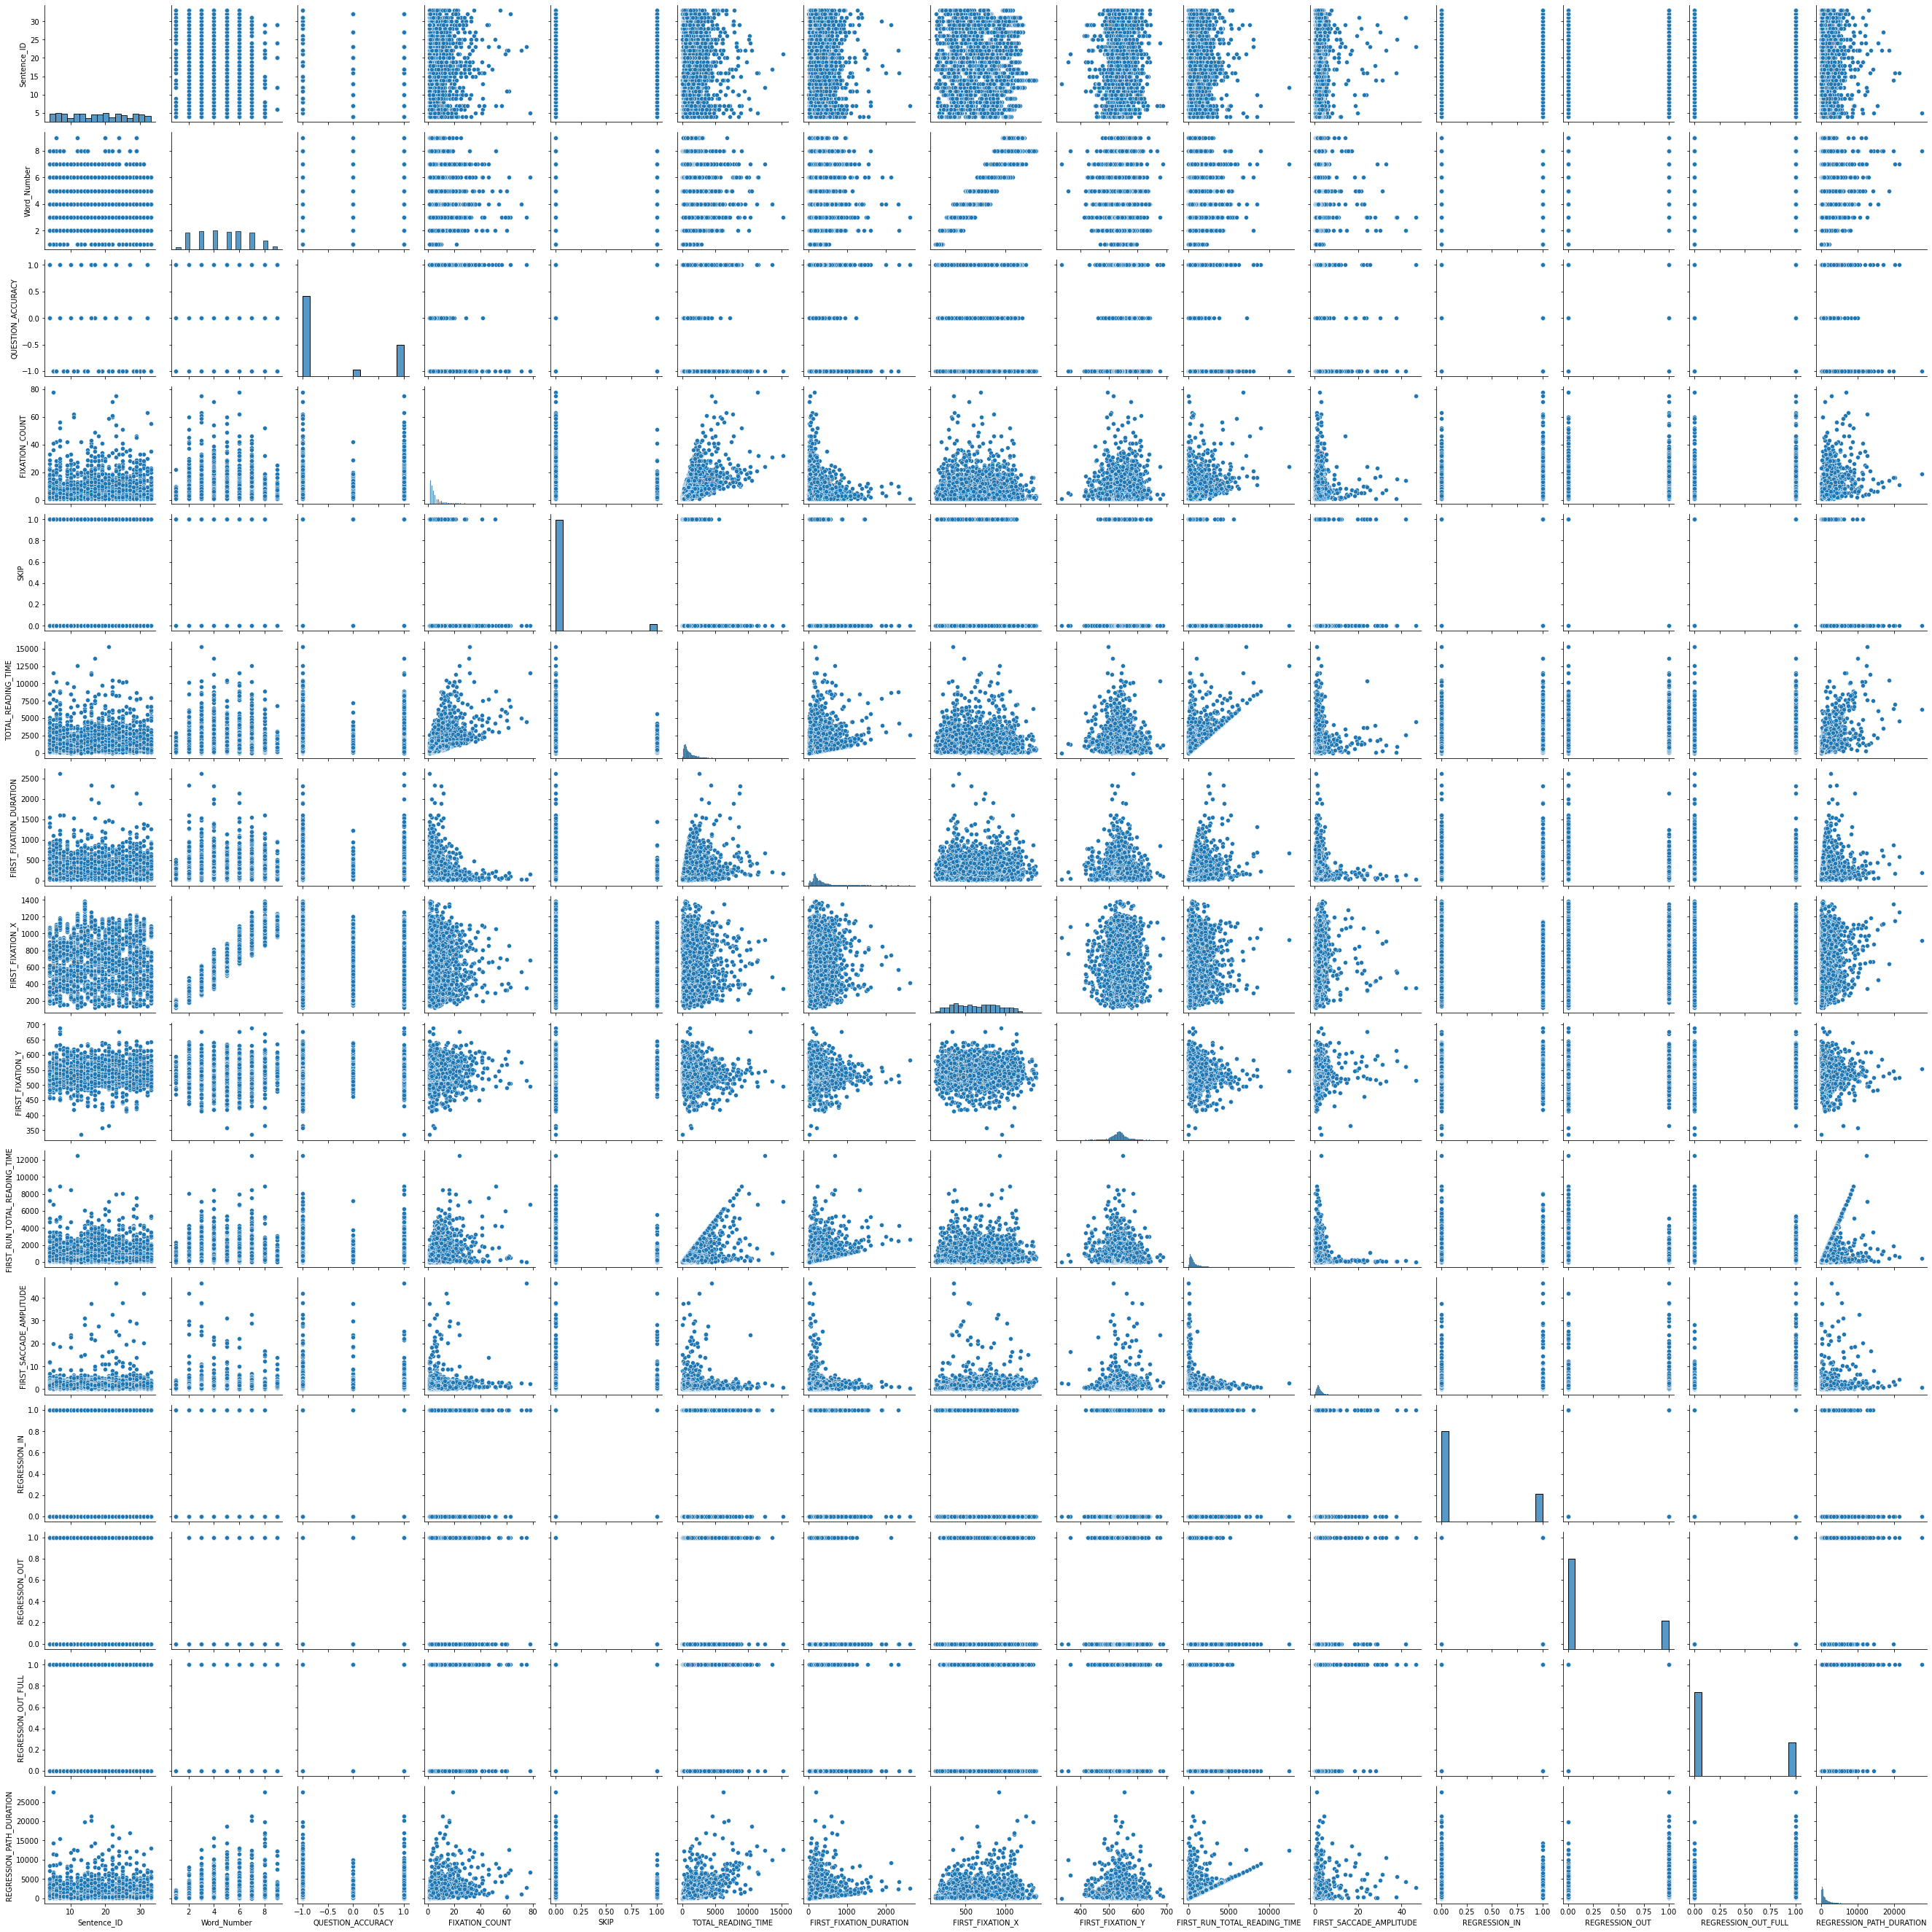

In [20]:


sns.pairplot(data=data_sets["risk"], )
plt.show()





- No linear correlation between any two pairs of the features

- features distribution could be important 




# Per Features plots

In [26]:
# col = "Sentence_ID"
# labels = None

# fig = plt.figure(figsize=(20, 10))
# ctr = 1
# colors = ["c", "g", "m", "b", "r", "y", "k"]
# for k, v in data_sets.items():
#     ax = fig.add_subplot(1, 3, ctr)  # three datasets
#     x = [len(v[col].loc[v[col]==f]) for f in set(v[col])]
#     x = np.asarray(x)
#     x = np.divide(x, x.sum())

#     labels = set(v[col])
#     ax.bar(x=np.arange(len(labels)),  
#            height=x,
#            color=colors[ctr]
#           )
    
#     plt.xlabel("Sentence ID", fontsize=10)
#     plt.ylabel("Sentence ratio", fontsize=12)
    
#     plt.title(k, fontsize=20)
#     ctr += 1
# plt.show()



In [27]:
def plot_bars(data, col, x_label, y_label):
    
    fig = plt.figure(figsize=(17, 7))
    ax = fig.add_subplot(1, 1, 1)  # three datasets


    xs, heights, titles = [], [], []

    for k, v in data.items():
        titles.append(k)
        x = np.asarray([len(v[col].loc[v[col]==f]) for f in set(v[col])])
        x = np.divide(x, x.sum())
        heights.append(x)
        labels = set(v[col])

        xs.append(np.arange(4, len(labels)+4))


    ax.bar(x=xs[0],
           height=heights[0],
           color="r",
           alpha=0.9
          )


    ax.bar(x=xs[1],  
           height=heights[1],
           color="y",
           alpha=0.6,
          )

    ax.bar(x=xs[2],  
           height=heights[2],
           color="g",
           alpha=0.3
          )



    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=12)

    plt.legend(titles)

    plt.show()
    
    
    return None



    
    

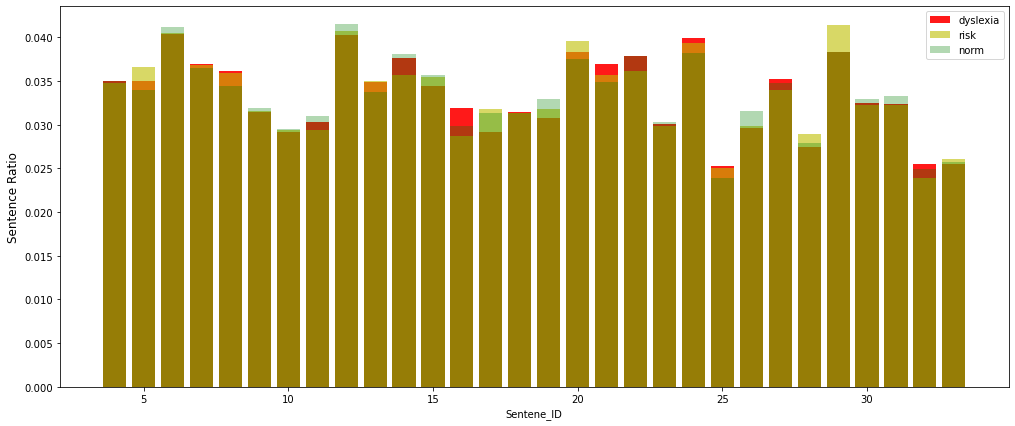

In [28]:

plot_bars(data=data_sets, col="Sentence_ID",
          x_label="Sentene_ID", 
          y_label="Sentence Ratio")




- Despite having fewer dyslexic/ at-risk participants, most of the sentences' ratio is higher than the normal group, which shows that these two groups repeated reading more sentences.
    
    - However, for sentences 5 and 29, normal participants repeated these two sentences more.



In [72]:
def plot_hists(data, col):
    
    colors = ["r", "y", "g"]
    fig = plt.figure(figsize=(20, 9))
    ctr = 1 
    for k, v in data.items():
        ax = fig.add_subplot(1, 3, ctr)  # three datasets
        x = v[col].values
        bins = np.linspace(x.min(), x.max(), 50)
        ax.hist(x=x, bins=bins, color=colors[ctr-1])
        ax.set_title(k, fontsize=16)
        ctr += 1

    fig.suptitle(col + " Distributions", fontsize=19)
    plt.show()
    
    return None

In [74]:
v[col]

40476     317.0
40379     621.0
40380     380.0
40381     381.0
40382     694.0
          ...  
50053    1636.0
50054     190.0
50055     646.0
50044    1762.0
50202    1661.0
Name: REGRESSION_PATH_DURATION, Length: 39622, dtype: float64

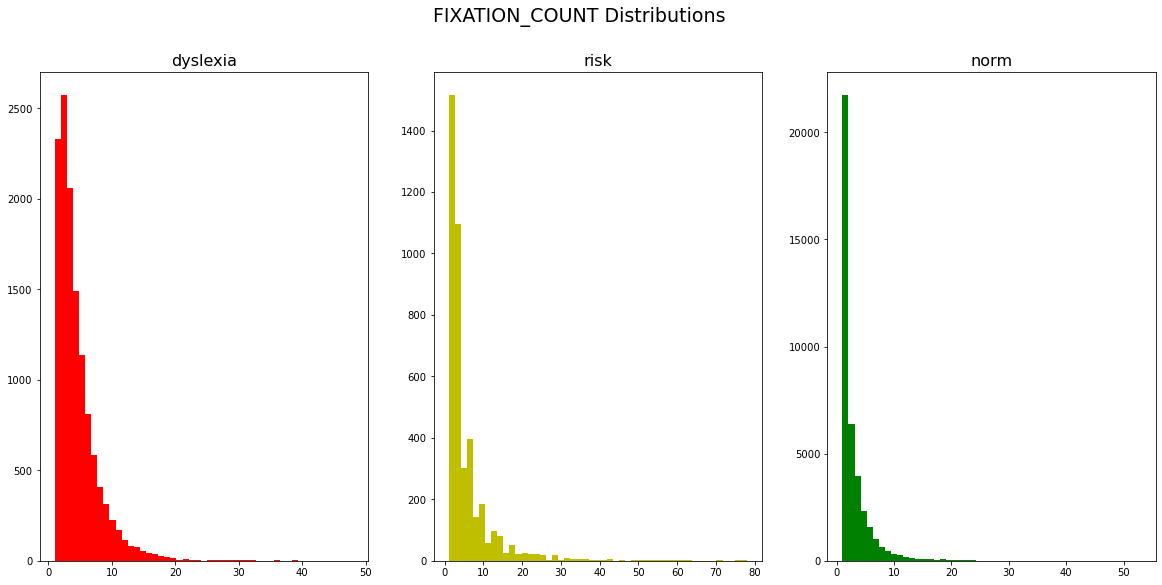

In [56]:


plot_hists(data=data_sets, col="FIXATION_COUNT")

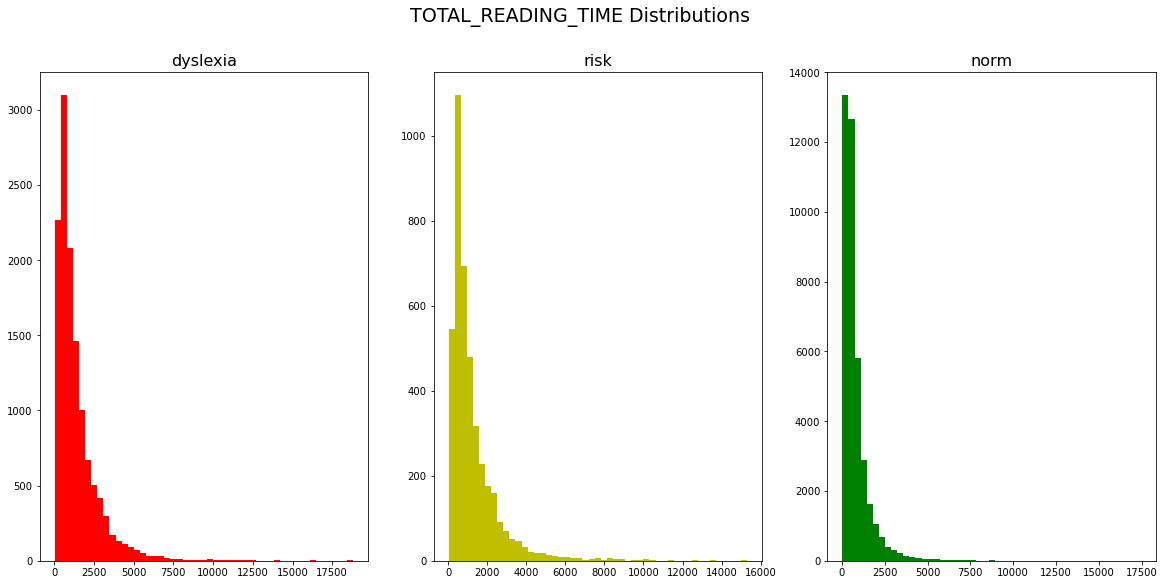

In [58]:


plot_hists(data=data_sets, col="TOTAL_READING_TIME")

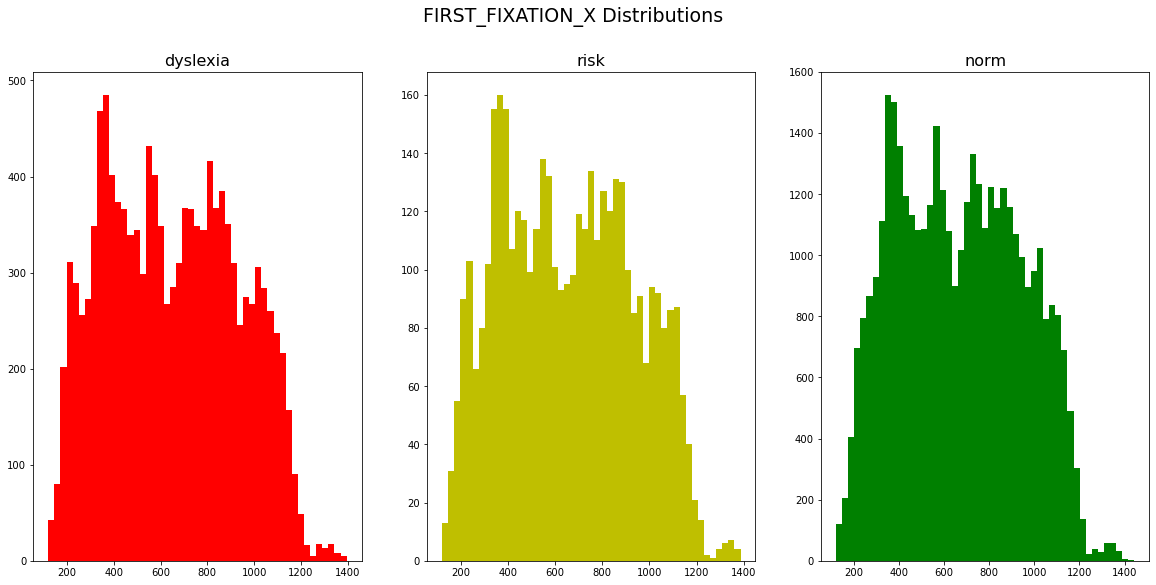

In [62]:
plot_hists(data=data_sets, col="FIRST_FIXATION_X")

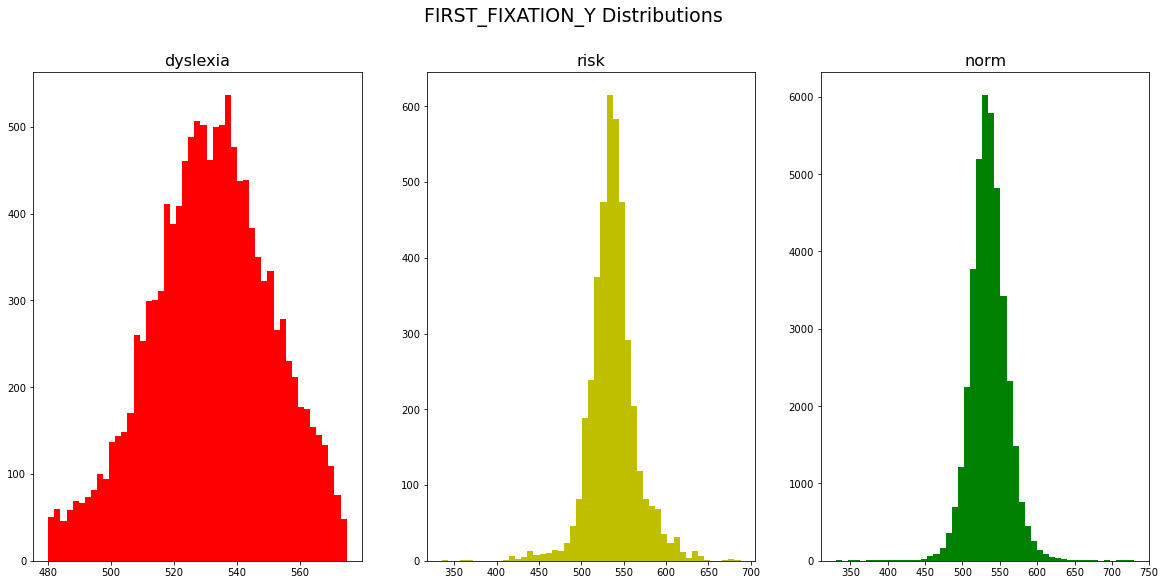

In [65]:
plot_hists(data=data_sets, col="FIRST_FIXATION_Y")

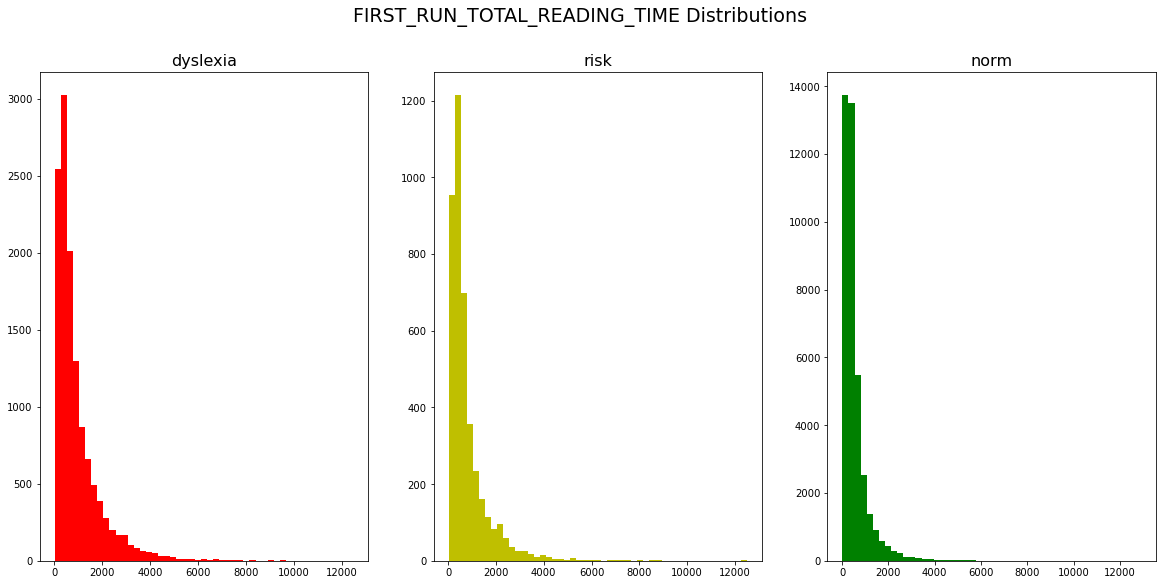

In [67]:
plot_hists(data=data_sets, col="FIRST_RUN_TOTAL_READING_TIME")

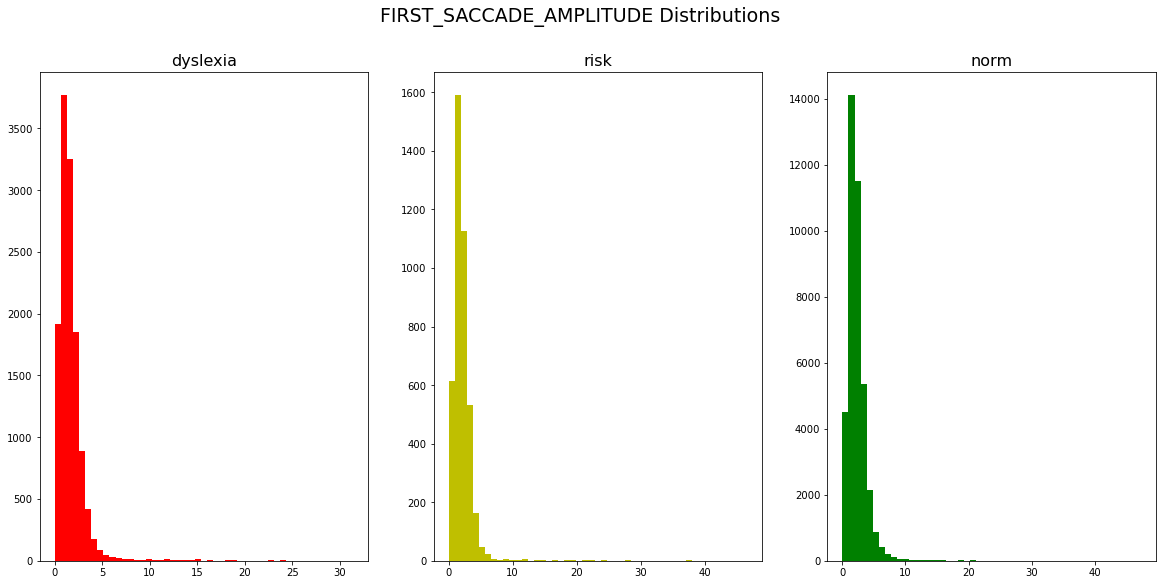

In [68]:
plot_hists(data=data_sets, col="FIRST_SACCADE_AMPLITUDE")

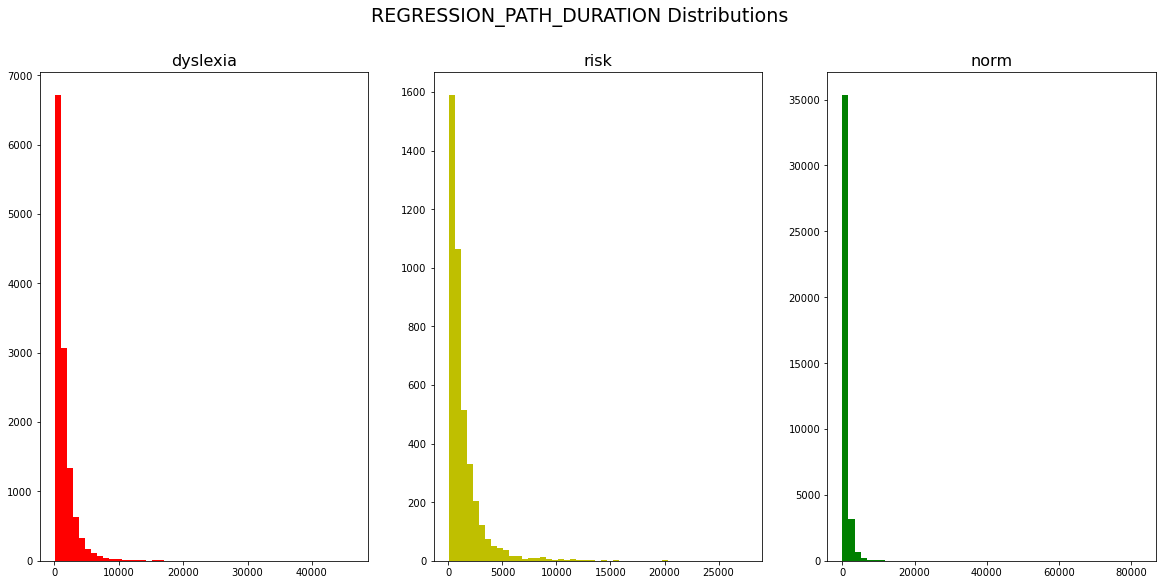

In [69]:
plot_hists(data=data_sets, col="REGRESSION_PATH_DURATION")